In this section we will be testing and plotting the hyperparameter improvement that has been used which is : Grid search on both Naive Beyes and Decision Tree. 80% of the dataset was used to train the models and 20% was used to test.

In [21]:
# ================================================================================
# Skincare Model Accuracy & Hyperparameter Tuning
# ================================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



This section imports all the Python libraries needed for loading data, processing text, training machine learning models, tuning their parameters, and visualizing results.

In [22]:
# ───────────────────────────────────────────────────────────────────────────────
# 1️⃣ Load dataset
# ───────────────────────────────────────────────────────────────────────────────
def load_dataset(file_path, text_col='text', target_col='category'):
    df = pd.read_csv(file_path)
    print(f"Dataset columns: {df.columns.tolist()}")  # Debugging

    if text_col not in df.columns or target_col not in df.columns:
        raise ValueError(f"Columns '{text_col}' or '{target_col}' not found in dataset.")

    # Drop missing values
    df = df.dropna(subset=[text_col, target_col])

    # Lowercase text
    df[text_col] = df[text_col].str.lower()

    X_raw = df[text_col]
    y = df[target_col]

    return X_raw, y

This section loads the skincare dataset from a CSV file, cleans it by removing missing values and converting text to lowercase, then separates it into input text (X_raw) and category labels (y)

In [23]:

# ───────────────────────────────────────────────────────────────────────────────
# 2️⃣ Create TF-IDF features
# ───────────────────────────────────────────────────────────────────────────────
def create_tfidf_features(X_raw, stop_words='english'):
    vectorizer = TfidfVectorizer(stop_words=stop_words)
    X = vectorizer.fit_transform(X_raw)
    return X, vectorizer
# ───────────────────────────────────────────────────────────────────────────────
# 3️⃣ Split dataset
# ───────────────────────────────────────────────────────────────────────────────
def split_dataset(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)



Section 2 (TF-IDF): This section converts text into numerical features using TF-IDF which measures word importance while removing common English stopwords.

Section 3 (Split): This section divides the data into 80% training and 20% testing sets while maintaining the same proportion of each category in both sets.

In [24]:
# ───────────────────────────────────────────────────────────────────────────────
# 4️⃣ Train original models
# ───────────────────────────────────────────────────────────────────────────────
def train_original_models(X_train, y_train, X_test, y_test):
    # Naive Bayes
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)
    nb_acc = accuracy_score(y_test, nb_model.predict(X_test))

    # Decision Tree
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)
    dt_acc = accuracy_score(y_test, dt_model.predict(X_test))

    return nb_model, dt_model, nb_acc, dt_acc


This section trains two baseline machine learning models (Naive Bayes and Decision Tree) on the training data with default settings and calculates their accuracy scores on the test data.

In [25]:
# ───────────────────────────────────────────────────────────────────────────────
# 5️⃣ Hyperparameter tuning
# ───────────────────────────────────────────────────────────────────────────────
def tune_naive_bayes(X_train, y_train, X_test, y_test):
    param_grid = {
        'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
        'fit_prior': [True, False]
    }
    grid = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    acc = accuracy_score(y_test, grid.predict(X_test))
    return grid.best_estimator_, acc, grid.best_params_

def tune_decision_tree(X_train, y_train, X_test, y_test):
    param_grid = {
        'max_depth': [5, 10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    }
    grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid,
                        cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    acc = accuracy_score(y_test, grid.predict(X_test))
    return grid.best_estimator_, acc, grid.best_params_


This section uses Grid Search to automatically test different parameter combinations for both Naive Bayes and Decision Tree models, finding the optimal settings that give the highest accuracy.

In [26]:
# ───────────────────────────────────────────────────────────────────────────────
# 6️⃣ Plot accuracy comparison
# ───────────────────────────────────────────────────────────────────────────────
def plot_accuracy_comparison(nb_original_acc, nb_tuned_acc, dt_original_acc, dt_tuned_acc):
    models = ['Naive Bayes', 'Decision Tree']
    original_acc = [nb_original_acc*100, dt_original_acc*100]
    tuned_acc = [nb_tuned_acc*100, dt_tuned_acc*100]
    improvements = [(nb_tuned_acc - nb_original_acc)*100, (dt_tuned_acc - dt_original_acc)*100]

    bar_width = 0.35
    x = np.arange(len(models))

    fig, ax = plt.subplots(figsize=(10, 6))
    bars1 = ax.bar(x - bar_width/2, original_acc, bar_width, label='Original', color='#4C72B0')
    bars2 = ax.bar(x + bar_width/2, tuned_acc, bar_width, label='Tuned', color='#55A868')

    # Add improvement text above bars
    for i in range(len(models)):
        ax.text(x[i] + bar_width/2, tuned_acc[i] + 0.5, f'+{improvements[i]:.2f}%',
                ha='center', va='bottom', fontweight='bold', color='#E76F51')

    ax.set_ylabel('Accuracy (%)', fontsize=12)
    ax.set_title('Model Accuracy Before and After Hyperparameter Tuning', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.legend()
    ax.set_ylim(0, 105)
    plt.show()



This section defines the  function for a  side-by-side bar chart comparing the accuracy of original vs tuned models for both Naive Bayes and Decision Tree, with improvement percentages displayed above the tuned model bars.

Dataset columns: ['query', 'category', 'subcategory']


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


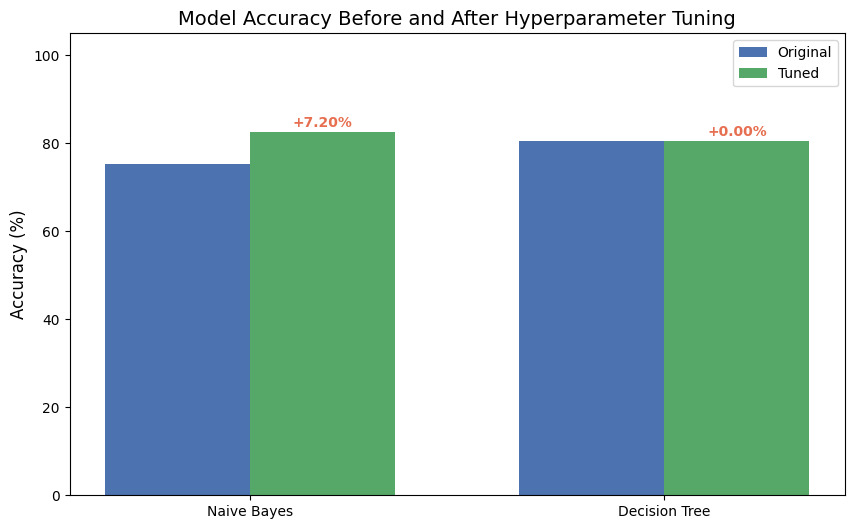

✅ Model Summary:
Naive Bayes - Original: 75.40%, Tuned: 82.60% (Improvement: +7.20%)
Decision Tree - Original: 80.50%, Tuned: 80.50% (Improvement: +0.00%)
Best Naive Bayes Params: {'alpha': 0.1, 'fit_prior': False}
Best Decision Tree Params: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [27]:
# ───────────────────────────────────────────────────────────────────────────────
# 7️⃣ Main pipeline
# ───────────────────────────────────────────────────────────────────────────────
def main():
    # Load dataset
    X_raw, y = load_dataset('skincare_dataset.csv', text_col='query', target_col='category')

    # TF-IDF features
    X, vectorizer = create_tfidf_features(X_raw)

    # Split data (stratified)
    X_train, X_test, y_train, y_test = split_dataset(X, y)

    # Train original models
    nb_model, dt_model, nb_original_acc, dt_original_acc = train_original_models(X_train, y_train, X_test, y_test)

    # Tune models
    nb_tuned_model, nb_tuned_acc, nb_best_params = tune_naive_bayes(X_train, y_train, X_test, y_test)
    dt_tuned_model, dt_tuned_acc, dt_best_params = tune_decision_tree(X_train, y_train, X_test, y_test)

    # Plot results
    plot_accuracy_comparison(nb_original_acc, nb_tuned_acc, dt_original_acc, dt_tuned_acc)

    # Print summary
    print("✅ Model Summary:")
    print(f"Naive Bayes - Original: {nb_original_acc*100:.2f}%, Tuned: {nb_tuned_acc*100:.2f}% (Improvement: +{(nb_tuned_acc-nb_original_acc)*100:.2f}%)")
    print(f"Decision Tree - Original: {dt_original_acc*100:.2f}%, Tuned: {dt_tuned_acc*100:.2f}% (Improvement: +{(dt_tuned_acc-dt_original_acc)*100:.2f}%)")
    print(f"Best Naive Bayes Params: {nb_best_params}")
    print(f"Best Decision Tree Params: {dt_best_params}")

# ───────────────────────────────────────────────────────────────────────────────
if __name__ == "__main__":
    main()

This section orchestrates the entire machine learning pipeline by calling all previous functions in sequence. We then get 4 bar charts each of them has the original and the tuned naive beyes and decision tree. with the help of Grid search hyperparameter naive bayes increased or improved its accuracy by 7,2%

In [ ]:
import os

# Search entire /content directory (including Google Drive if mounted)
print("Searching for skincare dataset...\n")

for root, dirs, files in os.walk('/content'):
    for file in files:
        if file.endswith('.csv'):
            full_path = os.path.join(root, file)
            print(f"Found CSV: {full_path}")

Searching for skincare dataset...

Found CSV: /content/sample_data/california_housing_train.csv
Found CSV: /content/sample_data/mnist_test.csv
Found CSV: /content/sample_data/mnist_train_small.csv
Found CSV: /content/sample_data/california_housing_test.csv


This section was solely used in the process of trying to find the skincare_dataset.csv file.